# Simulating $\pi$

The area of a circle $C$ is given as $|C| = \pi r^2$ with $r$ as the radius.

A square $S$ has area $|S| = w^2$ where $w$ is the length of a side of the square.

If we put a circle with radius $r$ inside of a square with edge $w=2r$ then the ratio of the areas is:

$$ratio = \frac{|C|}{|S|} = \frac{\pi r^2}{w^2} = \frac{\pi r^2}{(2r)^2} \frac{\pi r^2}{4r^2} = \frac{\pi}{4} $$

Thus if we multiply the ratio of the areas by 4 we have a formula for $pi$:
$$ \pi = 4 ratio$$ 
or
$$ \pi = 4\frac{|C|}{|S|}$$



We can use this relationship to simulate the ratio of the areas to generate an estimate of $\pi$.

Basically we take uniform random draws of an $x$ and $y$ coordinate for a point and look at the share of many such points that fall within the circle of all those that are in the square.

We want to get within $p=0.00001$ of the value of $\pi$ that is reported in Python and we are curious as to how many points we have to draw to achieve this level of accuracy.

In [106]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pi = math.pi # our benchmark that we want to estimate using simulation

In [3]:
pi

3.141592653589793

 # Exercise 1: prompt the user for two input values

Please input a convergence criterion (0.01, 0.001, 0.0001, 0.00001) and a sentinel value (integer), Spaced by spaces: 
0.00001 10000

Limits exceeded!
The percentage difference between the current estimate of Pi and the true value:  0.47400000000000003 %


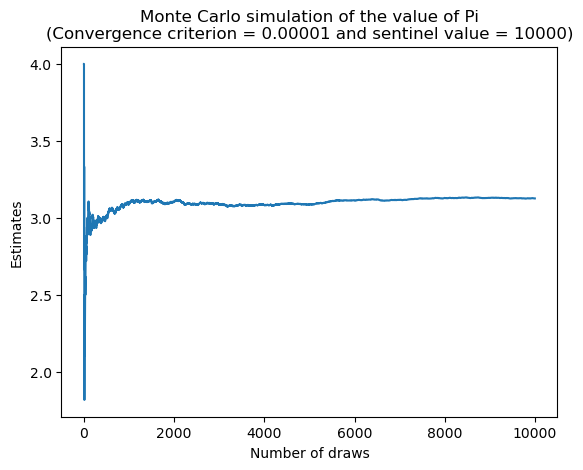

In [129]:
c,s = input('Please input a convergence criterion (0.01, 0.001, 0.0001, 0.00001) and a sentinel value (integer), Spaced by space: \n').split()
n = 0
d = 0
ratios = []
xs = []
ys = []
simulating_times = 1 # use as a sentinel

while simulating_times < int(s):
    simulating_times += 1
    x = random.random()
    y = random.random()
    xs.append(x)
    ys.append(y)
    if x**2 + y**2 <= 1.0:
        n += 1
    d += 1
    ratio = 4 * n * 1./d
    
#    print(ratio)
    ratios.append(ratio)
    percentage_diff = abs(ratio-pi) / pi
    if percentage_diff <= float(c):
        print("Draws needed: ", d)
        break

if percentage_diff > float(c):
        print("\nLimits exceeded!")
        print("The percentage difference between the current estimate of Pi and the true value: ", round(percentage_diff, 5) * 100, '%')


plt.plot(ratios)
plt.title('Monte Carlo simulation of the value of Pi\n(Convergence criterion = ' + c + ' and sentinel value = ' + s + ')')
plt.xlabel('Number of draws')
plt.ylabel('Estimates')
plt.show()

# Exercise 2: repeat experiment

In [120]:
random.seed(100)  # Ensure its reproducibility
c = [0.01, 0.001, 0.0001, 0.00001]  # Convergence criteria
n = 0
d = 0
ratios = []
estimates = []  # Store estimates for the 40 rounds of simulations
draw_times = []  # Store number of draws for the 40 rounds of simulations
xs = []
ys = []
simulating = True  # Use as a sentinel

for i in range(len(c)):
    for j in range(10):
        while simulating:
            x = random.random()
            y = random.random()
            xs.append(x)
            ys.append(y)
            if x**2 + y**2 <= 1.0:
                n += 1
            d += 1
            ratio = 4 * n * 1./d
            ratios.append(ratio)
            percentage_diff = abs(ratio-pi) / pi
            if percentage_diff <= c[i]:
                estimates.append(ratios[-1])  # Store estimates for the 40 rounds of simulations
                draw_times.append(d)  # Store number of draws for the 40 rounds of simulations
                print("Draws needed:%8d" % d, "( Experiment N0." + str(j + 1) + ',convergence criteria =', c[i], ')')
                break



Draws needed:       9 ( Experiment N0.1,convergence criteria = 0.01 )
Draws needed:      18 ( Experiment N0.2,convergence criteria = 0.01 )
Draws needed:      19 ( Experiment N0.3,convergence criteria = 0.01 )
Draws needed:      23 ( Experiment N0.4,convergence criteria = 0.01 )
Draws needed:      24 ( Experiment N0.5,convergence criteria = 0.01 )
Draws needed:      29 ( Experiment N0.6,convergence criteria = 0.01 )
Draws needed:      41 ( Experiment N0.7,convergence criteria = 0.01 )
Draws needed:      42 ( Experiment N0.8,convergence criteria = 0.01 )
Draws needed:      43 ( Experiment N0.9,convergence criteria = 0.01 )
Draws needed:      46 ( Experiment N0.10,convergence criteria = 0.01 )
Draws needed:     910 ( Experiment N0.1,convergence criteria = 0.001 )
Draws needed:     911 ( Experiment N0.2,convergence criteria = 0.001 )
Draws needed:    1593 ( Experiment N0.3,convergence criteria = 0.001 )
Draws needed:    1594 ( Experiment N0.4,convergence criteria = 0.001 )
Draws needed:  


All estimates:
 [3.111111111111111, 3.111111111111111, 3.1578947368421053, 3.130434782608696, 3.1666666666666665, 3.1724137931034484, 3.1219512195121952, 3.142857142857143, 3.1627906976744184, 3.130434782608696, 3.142857142857143, 3.1394072447859496, 3.138731952291274, 3.1392722710163112, 3.1398119122257055, 3.1403508771929824, 3.140889167188478, 3.141426783479349, 3.141963727329581, 3.1425, 3.1417910447761193, 3.1418002466091246, 3.1414514145141452, 3.141284403669725, 3.141809290953545, 3.1414634146341465, 3.141641337386018, 3.1414752116082223, 3.1416515973478, 3.141310883944678, 3.1416007036059805, 3.141605839416058, 3.1416109334108753, 3.141597796143251, 3.1416122004357296, 3.1415707853926964, 3.141602175277139, 3.1416173570019725, 3.141594038145762, 3.1416007036059805]


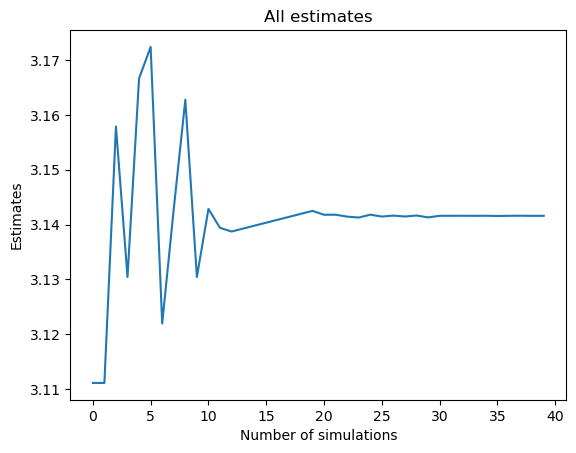

In [121]:
# Show estimates
print('\nAll estimates:\n', estimates)
plt.plot(estimates)
plt.title('All estimates')
plt.xlabel('Number of simulations')
plt.ylabel('Estimates')
plt.show()


All number of draws:
 [9, 18, 19, 23, 24, 29, 41, 42, 43, 46, 910, 911, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1608, 1622, 1626, 1635, 1636, 1640, 1645, 1654, 1659, 1663, 3411, 3425, 3439, 3630, 3672, 3998, 4781, 5070, 7917, 7959]


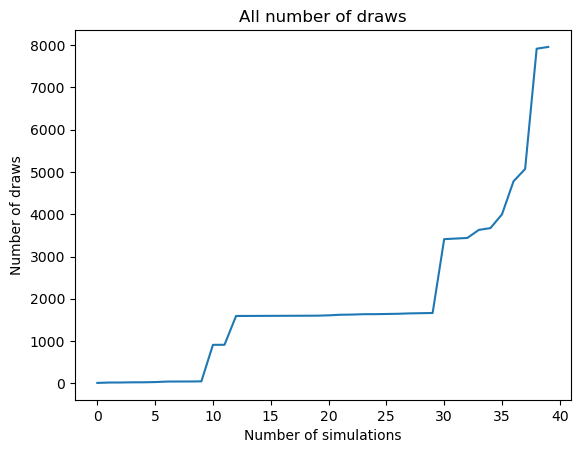

In [122]:
# Show number of draws
print('\nAll number of draws:\n', draw_times)
plt.plot(draw_times)
plt.title('All number of draws')
plt.xlabel('Number of simulations')
plt.ylabel('Number of draws')
plt.show()

In [126]:
# Calculate the avarage and standard deviation of the number of draws 
draws_average = []
draws_std = []
for i in range(len(c)):
    temp = draw_times[i*10 : (i+1)*10]
    draws_average.append(np.mean(temp))
    draws_std.append(np.std(temp))


Average number of draws required from the 10 runs:
 [29.4, 1459.3, 1638.8, 4730.2]


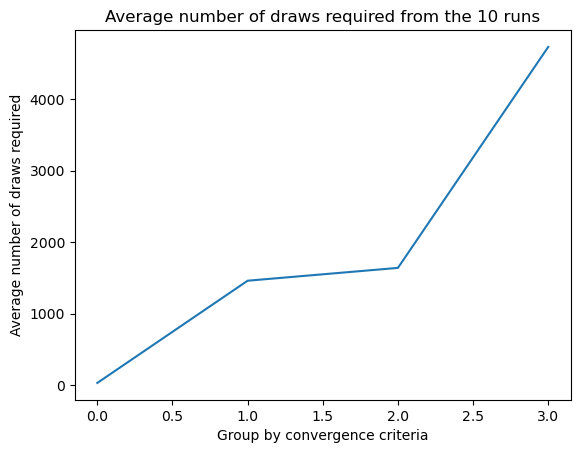

In [124]:
# Show the average of the number of draws
print('\nAverage number of draws required from the 10 runs:\n',draws_average)
plt.plot(draws_average)
plt.title('Average number of draws required from the 10 runs')
plt.xlabel('Group by convergence criteria')
plt.ylabel('Average number of draws required')
plt.show()


Standard deviation of the number of draws required from the 10 runs:
 [12.15894732285653, 274.4077440598206, 16.375591592366977, 1693.4067910576005]


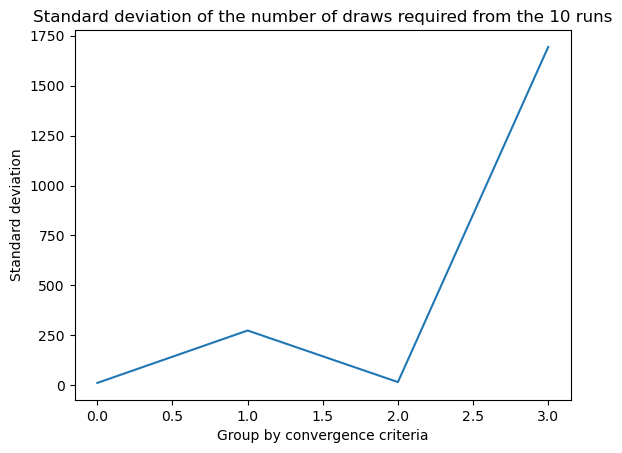

In [125]:
# Show the standard deviation of number of draws
print('\nStandard deviation of the number of draws required from the 10 runs:\n',draws_std)
plt.plot(draws_std)
plt.title('Standard deviation of the number of draws required from the 10 runs')
plt.xlabel('Group by convergence criteria')
plt.ylabel('Standard deviation')
plt.show()